In [118]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(lubridate) 
library(dplyr)
library(tidyr)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "cyclistic"                       "cyclistic-capstone-project-data"

**Mission Statement**

The bike shareing company Cyclistic would like to analyze their data to see the differences in behavior between their casual riders, and their member riders.

**Phase One: Ask**

Objectives:

1. Determine Business Task
* Cyclistic wants to see any differences between their casual riders, those who pay per ride, and their member riders, those who pay a membership fee anually. To do this I will look at data Cyclistic has collected about all the rides that took place in the last 12 months, July 2020 - June 2021.

2. Consider Key Stakeholders
* The key stakeholders for this task are the Cyclistic Marketing Analytics Team, the Cyclistic Executive Team, and Lily Moreno, the director of marketing. 

The Key Question to Guide my Analysis:

How do casual riders and anual members use Cyclistic bikes differently?


**Phase Two: Prepare**

Objectives:

1. Download the Data and Store it Properly
* The data comes from a public dataset from Motivate International Inc. A link to the data liscensing can be found <a href="https://www.divvybikes.com/data-license-agreement">here.</a>

2. Identify How the Data is Organized
* Each row of data in the spreadsheets represent a ride that took place. Each ride includes characteristics such as the start and end location, date, and time of the rides. The data also includes infomration about the latitude, longitude, and the rideID. 

3. Sort and Filter the Data
* The data I will use for this project will be the last twleve months of ride data. This timeframe is most relevant to the business task. Some of the data has missing information, so I will only be using the data that is complete with information about the bike type used, the location, and the timestamps that are in chronological order. 

4. Determine the Credibility of the Data
* Since the data is a public dataset collected directly from the company, it will be the most credible information to help me with the business task. A high majority of the data is complete, meaning the data I can use will be a large enough sample size to ensure credible analysis about the data. 

In [119]:
# First, I loaded all the data into the variables I will be using for the cleaning and analysis

ride_data_april_2020 = read.csv("../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv")
ride_data_may_2020 = read.csv("../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv")
ride_data_june_2020 = read.csv("../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv")
ride_data_july_2020 = read.csv("../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv")
ride_data_august_2020 = read.csv("../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv")
ride_data_september_2020 = read.csv("../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv")
ride_data_october_2020 = read.csv("../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv")
ride_data_november_2020 = read.csv("../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv")
ride_data_december_2020 = read.csv("../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv")
ride_data_january_2021 = read.csv("../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv")
ride_data_february_2021 = read.csv("../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv")
ride_data_march_2021 = read.csv("../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv")


In [120]:
# First I will group all the data into two groups based on the data type of start_station_id and end_station_id.

ride_data_with_ints = bind_rows(ride_data_april_2020,ride_data_may_2020,ride_data_june_2020,ride_data_july_2020,ride_data_august_2020,ride_data_september_2020,ride_data_october_2020,ride_data_november_2020)

ride_data_with_chars = bind_rows(ride_data_december_2020, ride_data_january_2021, ride_data_february_2021, ride_data_march_2021)

# Then I will mutate the data so it all matches.

ride_data_with_ints = mutate(ride_data_with_ints, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))

#finally, I will combine all the data into one variable.

all_ride_data = bind_rows(ride_data_with_ints, ride_data_with_chars)

head(all_ride_data)
glimpse(all_ride_data)
summary(all_ride_data)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-04-26 17:45:14", "2020-04-17 17:08:54", "2020…
$ ended_at           <chr> "2020-04-26 18:12:03", "2020-04-17 17:17:03", "2020…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

   ride_id          rideable_type       started_at          ended_at        
 Length:3489748     Length:3489748     Length:3489748     Length:3489748    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:3489748     Length:3489748     Length:3489748     Length:3489748    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

**Phase Three: Process**

Objectives:

1. Check the data for errors.
* one of the errors I have already spotted is some of the data has negative ride length, and there are many nulls I need to remove.

2. Choose your tools.
* I have already chosen to do this with the R programming language in a Kaggle Kernel.

3. Transform the data so you can work with it effectively.
* this will involve removing the errors and formatting the cleaned data to be analyzed in the next step.

4. Document the cleaning process.
* all the documentation will be in this Kaggle Kernel with comments to help readers understand what is happening in each step.



In [121]:
# To start the cleaning, I will add some columns to seperate out the data for analysis later.

all_ride_data$date = as.Date(all_ride_data$started_at)
all_ride_data$month = format(as.Date(all_ride_data$date), "%m")
all_ride_data$day = format(as.Date(all_ride_data$date), "%d")
all_ride_data$year = format(as.Date(all_ride_data$date), "%Y")
all_ride_data$weekday = format(as.Date(all_ride_data$date), "%A")

all_ride_data$ride_length = difftime(all_ride_data$ended_at,all_ride_data$started_at)

#I will drop all the NA information.

all_ride_data = drop_na(all_ride_data)

# One more thing I need to do is add a column for how long the trips were in km.

all_ride_data$ride_distance = distGeo(matrix(c(all_ride_data$start_lng, all_ride_data$start_lat), ncol = 2), matrix(c(all_ride_data$end_lng, all_ride_data$end_lat), ncol = 2))
all_ride_data$ride_distance = all_ride_data$ride_distance/1000
head(all_ride_data)



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,weekday,ride_length,ride_distance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>,<dbl>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,2020-04-26,04,26,2020,Sunday,1609 secs,3.9813458
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,2020-04-17,04,17,2020,Friday,489 secs,0.9796293
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,2020-04-01,04,01,2020,Wednesday,863 secs,2.9846612
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,2020-04-07,04,07,2020,Tuesday,732 secs,2.1413746
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,2020-04-18,04,18,2020,Saturday,3175 secs,9.1196849
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,2020-04-30,04,30,2020,Thursday,324 secs,0.9534335


In [122]:
# Some of the data shows a negative trip length. 
# These entries will be removed. 

all_rides_v2 = all_ride_data[!(all_ride_data$start_station_name == "HQ QR" | all_ride_data$ride_length<0),]

**Phase Four: Analyze**

Objectives:

1. Aggregate data so it is useful and accessible.
* completed in step 2.

2. Organize and format data.
* Since we will not be looking at all the data columns, I can remove those and look at only what I need to for the analysis step.

3. Perform calculations.
* Some of the calculations have already been completed in the spreadsheets, such as the day of the week the ride occured, and the length of the ride in time. I will also have to calculate the average ride length, and which day of the week most people were riding the Cyclistic bikes.

4. Identify trends and relationships.
* Going back to the original question: how do annual members and casual riders use Cyclistic differently, I can compare the results of the calculations with the type of membership to find any trends or relationships. 

In [123]:
summary(all_rides_v2)

   ride_id          rideable_type       started_at          ended_at        
 Length:3343996     Length:3343996     Length:3343996     Length:3343996    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:3343996     Length:3343996     Length:3343996     Length:3343996    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [124]:
# Descriptive analysis on ride_length

summary(all_rides_v2$ride_length)
mean(all_rides_v2$ride_length)
median(all_rides_v2$ride_length)
max(all_rides_v2$ride_length)
min(all_rides_v2$ride_length)

# Now to split it up by member_casual for comparisons

aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = mean)
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = median)
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = max)
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual, FUN = min)

# Then I can split it up by day of the week

all_rides_v2$weekday = ordered(all_rides_v2$weekday, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(all_rides_v2$ride_length ~ all_rides_v2$member_casual + all_rides_v2$weekday, FUN = mean)


                    


  Length    Class     Mode 
 3343996 difftime  numeric 

Time difference of 1671.03 secs

Time difference of 880 secs

Time difference of 3523202 secs

Time difference of 0 secs

all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,2706.601 secs
member,955.305 secs


all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,1289 secs
member,692 secs


all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,3341033 secs
member,3523202 secs


all_rides_v2$member_casual,all_rides_v2$ride_length
<chr>,<drtn>
casual,0 secs
member,0 secs


all_rides_v2$member_casual,all_rides_v2$weekday,all_rides_v2$ride_length
<chr>,<ord>,<drtn>
casual,Sunday,3049.9984 secs
member,Sunday,1085.6846 secs
casual,Monday,2703.9653 secs
member,Monday,907.3224 secs
casual,Tuesday,2431.1273 secs
member,Tuesday,897.9422 secs
casual,Wednesday,2428.7427 secs
member,Wednesday,903.0449 secs
casual,Thursday,2593.6766 secs


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



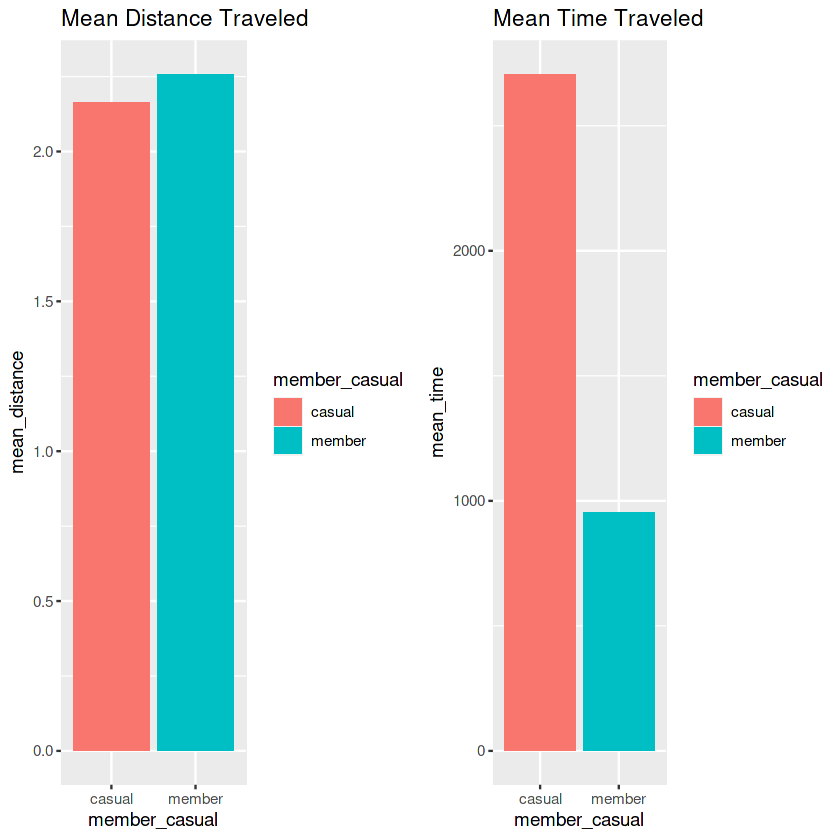

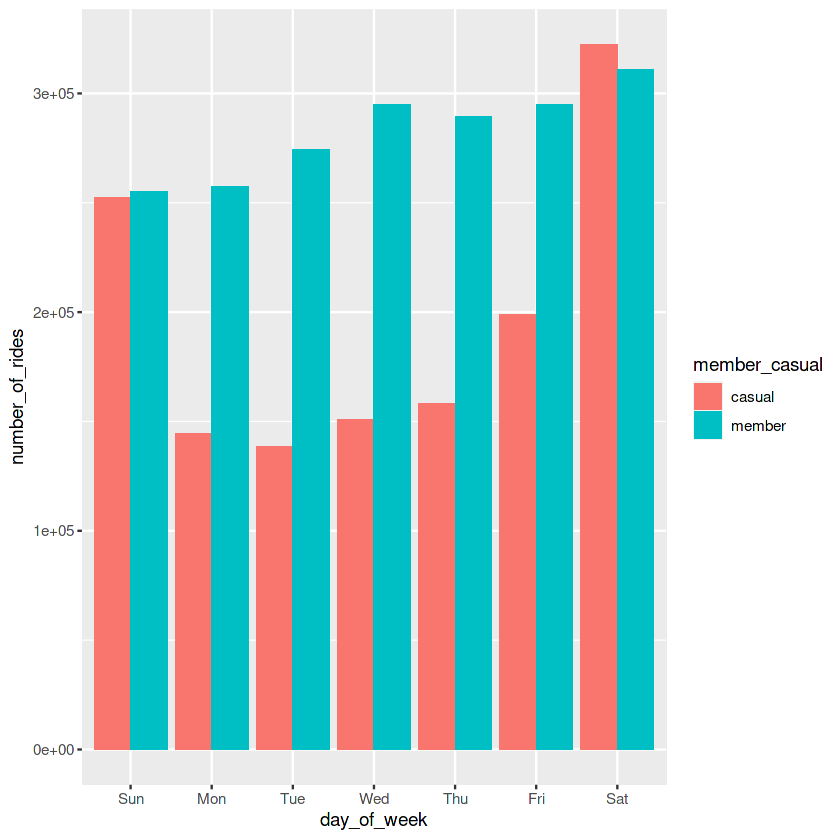

In [125]:
# Now with all the calculations out of the way I just have to visualize the information against membership type. 

membership_means = all_rides_v2 %>% group_by(member_casual) %>% summarise(mean_time = mean(ride_length), mean_distance = mean(ride_distance))

distance_plot = ggplot(membership_means) + 
                geom_col(mapping = aes(x=member_casual, y=mean_distance, fill = member_casual)) + 
                labs(title = "Mean Distance Traveled")
time_plot = ggplot(membership_means)+
            geom_col(mapping = aes(x=member_casual, y=mean_time, fill = member_casual))+
            labs(title= "Mean Time Traveled")

grid.arrange(distance_plot, time_plot, ncol = 2)

# Then we can create a graph that shows how many rides happened each day of the week


all_rides_v2 %>%
    mutate(day_of_week = wday(started_at, label = TRUE)) %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_rides = n(), 
              average_duration = mean(ride_length), .groups = 'drop') %>%
    arrange(member_casual,day_of_week) %>%
    ggplot(aes(x=day_of_week,y=number_of_rides,fill=member_casual))+
    geom_col(position="dodge")


**Phase Five: Share**

Objectives:

1. Determine the best way to share your findings
* At this point I could make this project public, and even create a presentation about the data analysis if I was actually presenting it to stakeholders.

2. Create effective data visualizaitons.
* Depending on how I wanted to visualize the data I could either keep the plots I already made, or use another tool to make different charts, such as tableau.

3. Present your findings.
* Again, if I was actually presenting this project, I could practice my presentation, and make sure it looks good and is understandable to other people. 

4. Ensure your work is accessible.
* The biggest thing would be to make sure all the comments are correct, and accurately show what I am doing every step of the way.

The first key finding of the data is shown in the first two plots. If we look at the chart on the left, we see that members and casual riders are almost traveling the same mean distance. This means a lot of the rides for both members and casual riders are the same distance. However, it is interesting to note the next graph shows how casual riders take much longer rides than members. This analysis suggests the members are trying to get from one location to the other quickly, such as for a commute, whereas the casual riders are traveling roughly the same distance as less than half the speed. This makes sense if the casual riders are tourists, or weekend riders looking to explore what the city has to offer. This is further confirmed when we look at the last graph showing how many rides happen each day of the week. We can see that the members have a very similar number of rides throughout the week, whereas the casual riders ride dramatically more on the weekend. 

**Phase Six: Act**

Objectives:

1. Create a portfolio.
* For this project I have decided to create a portfolio on Kaggle. However, I could also make a google sites portfolio.

2. Add your case study.
* This is the case study.

3. Practice presenting your case stydy to a friend or family member.
* I plan on showcasing this project to my parents, and roommates. 

Based on the original question, how can we convert more casual riders to annual memberships, my top three recomendations based on my analysis are: 

1. Cater towards the type of trip a casual member would be interested in doing. This would be a leisurely ride on the weekend. This could look like a social media campaign noting how much fun people are having on the weekends on these bikes, and talking about the benefits of getting an annual membership so people can enjoy access to the service all year.

2. Run a promotion that encourages casual members to join the membership program, such as with free weekends, guess passes, or other benefits.

3. Work with local businesses, public spaces, and entertainment venues to put on biking events around the city that are open to members, happen on the weekends, and allow people to bike along a path through the city, getting discounts at the places they are biking past. 